# **Modul 2: Data Analysis**
# Cohort Analysis & Plotly

### Dataset
https://www.kaggle.com/archit9406/customer-transaction-dataset

In [1]:
#library
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from operator import attrgetter  

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agar tabel pandas muncel secara keseluruhan
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  

# **No.1**

In [2]:
# Tampilkan dataset store_bike.csv! 
# Di dalamnya ada kolom 'transaction_date', ubah tipe datanya dari object menjadi datetime! 
# Hapus semua baris yang memiliki missing value

# read dataset
df = pd.read_csv('store_bike.csv', parse_dates=['transaction_date'])
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [3]:
# drop missing values
df.dropna(inplace=True)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  object        
 12  product_first_sold_date  19445 n

# **No.2**

In [5]:
# Departement marketing meminta Anda untuk membuat analisis perilaku pengguna platform selama tahun 2017. 
# Coba buatlah cohort analysis berdasarkan data yang diberikan kepada Anda!
# Bagaimana perilaku customer BikeStore selama setahun terakhir? 

In [6]:
# Pertama, buat kolom baru bernama 'cohort_month' yang isinya adalah transaksi pertama seorang customer
# caranya dengan mencari minimum date dari tiap customer, lalu ubah kedalam format bulan

df['cohort_month'] = df.groupby('customer_id')['transaction_date'].transform('min').dt.to_period('M')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,cohort_month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-02
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-01


In [7]:
# Buat kolom 'current_order_month' yang isinya adalah tanggal dari aktivitas yang dilakukan
# caranya dengan transform 'transaction_date' ke dalam format bulan

df['current_order_month']=df['transaction_date'].dt.to_period('M')
df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,cohort_month,current_order_month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-01,2017-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-01,2017-10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-02,2017-08
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-01,2017-01


In [8]:
# Cari total distict customer
# agrregate berdasarkan 'cohort_month' dan 'current_order_month'

df_cohort = df.groupby(['cohort_month','current_order_month']).agg(n_customer=('customer_id','nunique')).reset_index()
df_cohort.head()

,cohort_month,current_order_month,n_customer
0,2017-01,2017-01,1331
1,2017-01,2017-02,479
2,2017-01,2017-03,467
3,2017-01,2017-04,467
4,2017-01,2017-05,480


In [9]:
# Buat kolom baru bernama 'period' yg isisnya adalah berapa bulan jarak antara transaksi pertama denga transaksi saat itu  

df_cohort['period'] = (df_cohort['current_order_month'] - df_cohort['cohort_month']).apply(attrgetter('n')) # ambil hanya angkanya saja, tanpa atribut bulan
df_cohort.head()

,cohort_month,current_order_month,n_customer,period
0,2017-01,2017-01,1331,0
1,2017-01,2017-02,479,1
2,2017-01,2017-03,467,2
3,2017-01,2017-04,467,3
4,2017-01,2017-05,480,4


In [10]:
# df_cohort['current_order_month'] - df_cohort['cohort_month']

In [11]:
df_cohort['period'] = (df_cohort['current_order_month'] - df_cohort['cohort_month']) # ambil hanya angkanya saja, tanpa atribut bulan
df_cohort['period'] = df_cohort['period'].apply(attrgetter('n'))

df_cohort.head()

,cohort_month,current_order_month,n_customer,period
0,2017-01,2017-01,1331,0
1,2017-01,2017-02,479,1
2,2017-01,2017-03,467,2
3,2017-01,2017-04,467,3
4,2017-01,2017-05,480,4


In [12]:
# Buat pivot tabel antara 'cohort_month' vs 'period'
# Isi tiap cellnya adalah n_customer (jumlah customer)

cohort_retention_pivot = df_cohort.pivot_table(
                                            index='cohort_month',
                                            columns='period',
                                            values='n_customer'
                                            )

cohort_retention_pivot

period,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,1331.0,479.0,467.0,467.0,480.0,467.0,509.0,495.0,465.0,503.0,493.0,490.0
2017-02,790.0,309.0,302.0,313.0,279.0,284.0,320.0,305.0,321.0,297.0,265.0,NaN
2017-03,506.0,184.0,182.0,193.0,184.0,218.0,190.0,187.0,198.0,209.0,NaN,NaN
2017-04,314.0,101.0,115.0,128.0,118.0,105.0,128.0,128.0,126.0,NaN,NaN,NaN
2017-05,215.0,78.0,86.0,82.0,78.0,89.0,66.0,81.0,NaN,NaN,NaN,NaN
2017-06,120.0,42.0,50.0,49.0,38.0,43.0,45.0,NaN,NaN,NaN,NaN,NaN
2017-07,87.0,45.0,23.0,33.0,37.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,53.0,17.0,16.0,21.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,35.0,12.0,10.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Ubah jumlah customer ke dalam persen

cohort_size = cohort_retention_pivot.iloc[:, 0] #jumlah customer di bulan 0
cohort_size

cohort_month
2017-01    1331.0
2017-02     790.0
2017-03     506.0
2017-04     314.0
2017-05     215.0
2017-06     120.0
2017-07      87.0
2017-08      53.0
2017-09      35.0
2017-10      24.0
2017-11      12.0
2017-12       5.0
Freq: M, Name: 0, dtype: float64

In [14]:
# Membagi tiap data dengan kolom 0 (dalam baris yang sama) 

retention_in_percentage = cohort_retention_pivot.divide(cohort_size, axis=0)
retention_in_percentage

period,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,1.0,0.359880,0.350864,0.350864,0.360631,0.350864,0.382419,0.371901,0.349361,0.377911,0.370398,0.368144
2017-02,1.0,0.391139,0.382278,0.396203,0.353165,0.359494,0.405063,0.386076,0.406329,0.375949,0.335443,NaN
2017-03,1.0,0.363636,0.359684,0.381423,0.363636,0.430830,0.375494,0.369565,0.391304,0.413043,NaN,NaN
2017-04,1.0,0.321656,0.366242,0.407643,0.375796,0.334395,0.407643,0.407643,0.401274,NaN,NaN,NaN
2017-05,1.0,0.362791,0.400000,0.381395,0.362791,0.413953,0.306977,0.376744,NaN,NaN,NaN,NaN
2017-06,1.0,0.350000,0.416667,0.408333,0.316667,0.358333,0.375000,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.517241,0.264368,0.379310,0.425287,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.320755,0.301887,0.396226,0.264151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.342857,0.285714,0.485714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


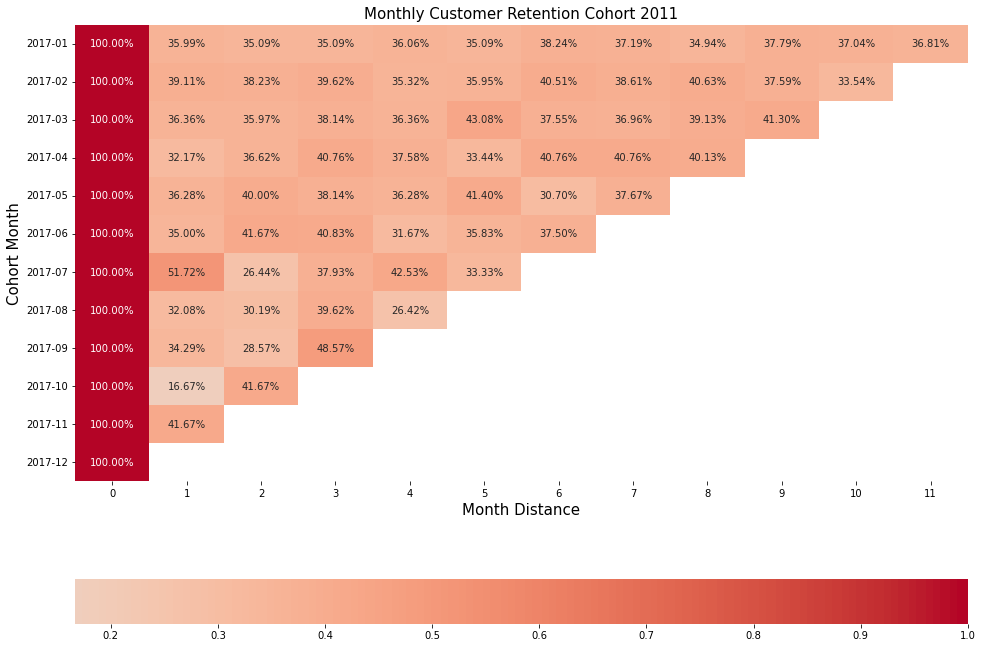

In [15]:
# Buat heatmap

plt.figure(figsize=(16,12))

sns.heatmap(
    data = retention_in_percentage, 
    annot = True,
    cmap = 'coolwarm', 
    center = 0,
    fmt = '.2%', 
    cbar_kws = {'orientation':'horizontal'}

)

plt.xlabel('Month Distance', size=15)
plt.ylabel('Cohort Month', size=15)
plt.title('Monthly Customer Retention Cohort 2011',size=15),
plt.show()

In [16]:
# Rata-rata customer yang bertahan tiap bulannya
retention_in_percentage.mean()[1:].mean()

0.3713805598753716

**Insight:**
- Warna yang lebih gelap menunjukkan jumlah customer yang bertahan lebih banyak. 
- Contoh: 51.72% customers yg melakukan transaksi pertama di bulan Juli 2017 yang masih bertahan di bulan selanjutnya.
- Warna yang lebih terang menunjukkan jumlah customer yang bertahan lebih sedikit. 
- Contoh: hanya 16.67% customers yg melakukan transaksi pertama di bulan Oktober 2017 yang masih bertahan di bulan selanjutnya.




In [17]:
# duplikat df_cohort
df_lineplot = df_cohort.copy()

# ubah kolom 'cohort_month' menjadi string
df_lineplot['cohort_month'] = df_cohort['cohort_month'].astype(str)

# ubah kolom 'current_order_month' menjadi string
df_lineplot['current_order_month'] = df_cohort['current_order_month'].astype(str)

df_lineplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cohort_month         78 non-null     object
 1   current_order_month  78 non-null     object
 2   n_customer           78 non-null     int64 
 3   period               78 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB


In [18]:
df_lineplot.head(10)

,cohort_month,current_order_month,n_customer,period
0,2017-01,2017-01,1331,0
1,2017-01,2017-02,479,1
2,2017-01,2017-03,467,2
3,2017-01,2017-04,467,3
4,2017-01,2017-05,480,4
5,2017-01,2017-06,467,5
6,2017-01,2017-07,509,6
7,2017-01,2017-08,495,7
8,2017-01,2017-09,465,8
9,2017-01,2017-10,503,9


In [19]:
# Jumlah customer berdasarkan cohort_month (bulan pertama kali transaksi)
df_plot_state = df_lineplot.groupby('cohort_month').agg({'n_customer':'max'})
df_plot_state

,n_customer
cohort_month,
2017-01,1331
2017-02,790
2017-03,506
2017-04,314
2017-05,215
2017-06,120
2017-07,87
2017-08,53
2017-09,35


In [20]:
# Membagi n_customer tiap baris dari df_lineplot dengan n_customer dari df_plot_state berdasarkan kesamaan 'cohort_month'
df_plot = df_lineplot.set_index(["cohort_month"]).div(df_plot_state, level = 'cohort_month') * 100
df_plot.head(10)

,current_order_month,n_customer,period
cohort_month,,,
2017-01,NaN,100.000000,NaN
2017-01,NaN,35.987979,NaN
2017-01,NaN,35.086401,NaN
2017-01,NaN,35.086401,NaN
2017-01,NaN,36.063110,NaN
2017-01,NaN,35.086401,NaN
2017-01,NaN,38.241923,NaN
2017-01,NaN,37.190083,NaN
2017-01,NaN,34.936138,NaN


In [21]:
# rename dan indexing kolom
df_plot = df_plot.reset_index()[['cohort_month','n_customer']].rename(columns = {'n_customer':'percentage_customers'})
df_plot.head(10)


,cohort_month,percentage_customers
0,2017-01,100.000000
1,2017-01,35.987979
2,2017-01,35.086401
3,2017-01,35.086401
4,2017-01,36.063110
5,2017-01,35.086401
6,2017-01,38.241923
7,2017-01,37.190083
8,2017-01,34.936138
9,2017-01,37.791134


In [22]:
# Masukkan kolom 'current_order_month' dan 'period_number'
df_plot['current_order_month'] = df_lineplot['current_order_month']
df_plot['period_number'] = df_lineplot['period']
df_plot.head(10)


,cohort_month,percentage_customers,current_order_month,period_number
0,2017-01,100.000000,2017-01,0
1,2017-01,35.987979,2017-02,1
2,2017-01,35.086401,2017-03,2
3,2017-01,35.086401,2017-04,3
4,2017-01,36.063110,2017-05,4
5,2017-01,35.086401,2017-06,5
6,2017-01,38.241923,2017-07,6
7,2017-01,37.190083,2017-08,7
8,2017-01,34.936138,2017-09,8
9,2017-01,37.791134,2017-10,9


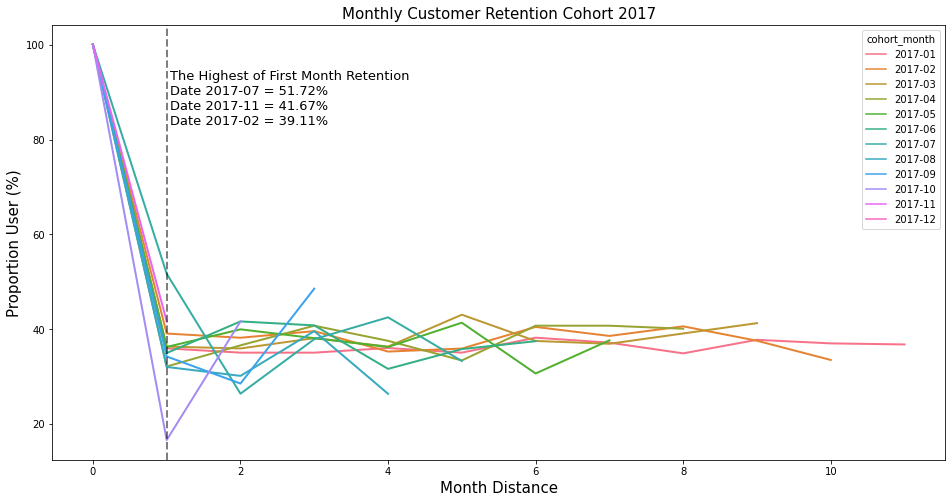

In [23]:
# Buat lineplot
plt.figure(figsize=(16,8))

sns.lineplot(
            x='period_number',
            y='percentage_customers',
            data=df_plot, 
            hue='cohort_month',
            dashes=True,
            linewidth=2,
            palette='husl'
            )

plt.title('Monthly Customer Retention Cohort 2017',size=15)
plt.xlabel('Month Distance',size=15)
plt.ylabel('Proportion User (%)',size=15)

## Optional: Create a line to inform the best 3 of first month retention
top_3 = df_plot[df_plot["period_number"]==1].sort_values("percentage_customers",ascending=False).iloc[:3]
top_3_name = top_3["cohort_month"].tolist()
top_3_value = [round(x,2) for x in top_3["percentage_customers"].tolist()]

# String information
text_plot = f"""
The Highest of First Month Retention
Date {top_3_name[0]} = {top_3_value[0]}%
Date {top_3_name[1]} = {top_3_value[1]}%
Date {top_3_name[2]} = {top_3_value[2]}%
"""
plt.axvline(x=1, linestyle='--', color="black", lw=2, alpha=.5)
plt.text(1.05, 80, text_plot,fontsize=13)
plt.show()

# **No.3**

In [24]:
# Bandingkan total omzet/hasil penjualan dari tiap brand!
# Brand apa yang menghasilkan omzet paling tinggi?   
# Buatlah visualisasinya!

df.head() 

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,cohort_month,current_order_month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-01,2017-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-01,2017-10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-02,2017-08
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-01,2017-01


In [25]:
df['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [26]:
df[df['order_status']=='Approved'].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,cohort_month,current_order_month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-01,2017-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-01,2017-10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-02,2017-08
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-01,2017-01


In [27]:
df_brand_omzet = df[df['order_status']=='Approved'].groupby('brand', as_index=False).sum()[['brand','list_price']].sort_values(by='list_price', ascending=False)
df_brand_omzet

,brand,list_price
3,Solex,4349881.08
5,WeareA2B,4065955.16
0,Giant Bicycles,3973717.00
4,Trek Bicycles,3447480.46
2,OHM Cycles,2907794.33
1,Norco Bicycles,2591581.61


In [28]:
#  Plotly Express
fig = px.bar(data_frame = df_brand_omzet,
             x = "brand", 
             y = "list_price",
             title = "Total Sales by Brand")
             
fig.show()

In [29]:
# Graphic Objects Plotly (Simple)
# Create subplot with 1 row and 2 columns
# in matplotlib, this is similar with plt.subplots(1, 2)

fig = make_subplots(rows=1, 
                    cols=1, 
                    specs=[[{'type':'bar'}]])


# Create first pie plot about survival data in coords (1,1)
fig.add_trace(go.Bar(y = df_brand_omzet["brand"], 
                     x = df_brand_omzet["list_price"],
                     orientation='h'), 1,1
              )

fig.update_layout(
       title_text='Total Sales by Brand',
       width=600,
       height=400
       )

fig.show()


# **No.4**

Treemaps display hierarchical (tree-structured) data as a set of nested rectangles. Each branch of the tree is given a rectangle, which is then tiled with smaller rectangles representing sub-branches. A leaf node's rectangle has an area proportional to a specified dimension of the data. Often the leaf nodes are colored to show a separate dimension of the data.
-Wikipedia

In [30]:
# Tampilkan visualisasi total omzet (list_price) per product class per brand secara hierarchial (Treemaps)!

df_brand_class_omzet = df[df['order_status']=='Approved'].groupby(['brand','product_class'], as_index=False).sum()[['brand','product_class','list_price']].sort_values(by=['brand','product_class'], ascending=True)
df_brand_class_omzet

,brand,product_class,list_price
0,Giant Bicycles,high,1048204.66
1,Giant Bicycles,low,112149.40
2,Giant Bicycles,medium,2813362.94
3,Norco Bicycles,high,659152.50
4,Norco Bicycles,low,407820.06
5,Norco Bicycles,medium,1524609.05
6,OHM Cycles,high,675288.39
7,OHM Cycles,low,631311.24
8,OHM Cycles,medium,1601194.70
9,Solex,high,661280.66


In [31]:
# Treemap using Plotly Express
fig = px.treemap(df_brand_class_omzet,
                 path = ["brand","product_class"], 
                 values ='list_price', 
                 color = "list_price",
                 color_continuous_scale = 'YlGnBu',
                 width=1000,
                 height=700,
                 title = "Total Sales by Brand and Class"
                 )
fig.show()

# **No.5**

In [32]:
# Dari customer yang melakukan transaksi pertama di bulan januari, 
# tampilkan progres perubahan jumlah customer dari Januari sampai Desember 2017 (Waterfall Plot)!

df_cohort.columns

Index(['cohort_month', 'current_order_month', 'n_customer', 'period'], dtype='object')

In [39]:
df_cohort

,cohort_month,current_order_month,n_customer,period
0,2017-01,2017-01,1331,0
1,2017-01,2017-02,479,1
2,2017-01,2017-03,467,2
3,2017-01,2017-04,467,3
4,2017-01,2017-05,480,4
5,2017-01,2017-06,467,5
6,2017-01,2017-07,509,6
7,2017-01,2017-08,495,7
8,2017-01,2017-09,465,8
9,2017-01,2017-10,503,9


In [33]:
# Customer yg transaksi pertamanya bulan Januari
df_jan = df_cohort[df_cohort['cohort_month']=='2017-01']
df_jan

,cohort_month,current_order_month,n_customer,period
0,2017-01,2017-01,1331,0
1,2017-01,2017-02,479,1
2,2017-01,2017-03,467,2
3,2017-01,2017-04,467,3
4,2017-01,2017-05,480,4
5,2017-01,2017-06,467,5
6,2017-01,2017-07,509,6
7,2017-01,2017-08,495,7
8,2017-01,2017-09,465,8
9,2017-01,2017-10,503,9


In [34]:
# buat kolom n_customer_lag dari kolom n_customer yang digeser 1 baris ke bawah
df_jan['n_customer_lag'] = df_jan['n_customer'].shift(1)

df_jan['changes'] = df_jan['n_customer'] - df_jan['n_customer_lag']
df_jan

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cohort_month,current_order_month,n_customer,period,n_customer_lag,changes
0,2017-01,2017-01,1331,0,NaN,NaN
1,2017-01,2017-02,479,1,1331.0,-852.0
2,2017-01,2017-03,467,2,479.0,-12.0
3,2017-01,2017-04,467,3,467.0,0.0
4,2017-01,2017-05,480,4,467.0,13.0
5,2017-01,2017-06,467,5,480.0,-13.0
6,2017-01,2017-07,509,6,467.0,42.0
7,2017-01,2017-08,495,7,509.0,-14.0
8,2017-01,2017-09,465,8,495.0,-30.0
9,2017-01,2017-10,503,9,465.0,38.0


In [35]:
df_jan['changes'].fillna(1331, inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_jan

,cohort_month,current_order_month,n_customer,period,n_customer_lag,changes
0,2017-01,2017-01,1331,0,NaN,1331.0
1,2017-01,2017-02,479,1,1331.0,-852.0
2,2017-01,2017-03,467,2,479.0,-12.0
3,2017-01,2017-04,467,3,467.0,0.0
4,2017-01,2017-05,480,4,467.0,13.0
5,2017-01,2017-06,467,5,480.0,-13.0
6,2017-01,2017-07,509,6,467.0,42.0
7,2017-01,2017-08,495,7,509.0,-14.0
8,2017-01,2017-09,465,8,495.0,-30.0
9,2017-01,2017-10,503,9,465.0,38.0


In [37]:
df_jan["current_order_month"].apply(lambda x: str(x))

0     2017-01
1     2017-02
2     2017-03
3     2017-04
4     2017-05
5     2017-06
6     2017-07
7     2017-08
8     2017-09
9     2017-10
10    2017-11
11    2017-12
Name: current_order_month, dtype: object

In [42]:
# Create the layout
layout = go.Layout(
    title= "Monthly Customer Number Changes (Jan-Des 2017)",
    showlegend=False,
    yaxis=dict(title='Number of Customer'),
    xaxis=dict(title='Month')
    
)

# Calculate the latest number of employee
all_customers = int(df_jan["n_customer"].sum() - df_jan["n_customer_lag"].sum())

# Create the waterfall plot
## For variable 'measure', relative stands for changes of the data (red/green barplot), while total stands for the last data (blue barplot)
fig = go.Figure(go.Waterfall(
                    name = "Customer Number", 
                    orientation = "v",
                    textposition = "outside",
                    x = df_jan["current_order_month"].apply(lambda x: str(x)),
                    y = df_jan["changes"],
                    # measure = ["relative" for x in range(len(df_jan["changes"]))]+["total"],
                    # text = [str(x) if x <=0 else "+"+str(x) for x in df_jan["changes"]]+[str(all_employees)],
                    connector = {"line":{"color":"rgb(63, 63, 63)", "dash":"solid"}},
                    ), 
                layout= layout
)

fig.show()

In [40]:
all_customers = int(df_jan["n_customer"].sum() - df_jan["n_customer_lag"].sum())
all_customers

490